1.	Import the libraries
2.	Import the dataset
3.	Extract X and Y as independent and dependent variables respectively
4.	Initialize the SVM model with NuSVC
5.	Fit the model
6.	Plot the points with their respected classes

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("19BCE2072_Non_Linear_SVM_Data.csv")
data

,X1,X2,Y
0,2,2,1
1,2,-2,1
2,-2,-2,1
3,-2,2,1
4,1,1,0
5,1,-1,0
6,-1,1,0
7,-1,-1,0


In [3]:
X = data.iloc[:,:2].to_numpy()
X

array([[ 2,  2],
       [ 2, -2],
       [-2, -2],
       [-2,  2],
       [ 1,  1],
       [ 1, -1],
       [-1,  1],
       [-1, -1]])

In [4]:
y = data.iloc[:,2].to_numpy()
y

array([1, 1, 1, 1, 0, 0, 0, 0])

In [5]:
clf = svm.NuSVC(gamma="auto")
clf.fit(X, y)

NuSVC(gamma='auto')

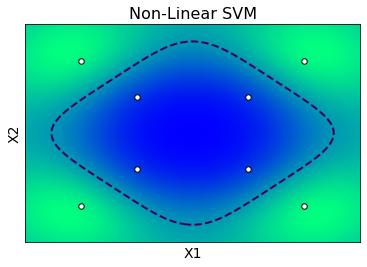

In [6]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.get_cmap('winter')
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:,0], X[:,1], s=30,color='white', cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.xlabel(data.columns[0], size=14)
plt.ylabel(data.columns[1], size=14)
plt.title('Non-Linear SVM', size=16)
plt.show()